<a href="https://colab.research.google.com/github/SCaRreC/Deep_learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!git clone https://github.com/SCaRreC/Deep_learning.git


fatal: destination path 'Deep_learning' already exists and is not an empty directory.


In [64]:
#from google.colab import drive
#drive.mount('/content/drive')


In [65]:
# Libraries and initial configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import cv2
from torchvision import transforms
import os
import random
from PIL import Image
import torch
#import sys
#sys.path.insert(0, '/content/drive/MyDrive/Bootcamp/Deep_learning/src')
#from utils import fit_transform_features, transform_features, ds_poi
from Deep_learning.src.utils import *
import joblib


In [66]:
!ls /content/Deep_Learning/src/utils.py

ls: cannot access '/content/Deep_Learning/src/utils.py': No such file or directory


In [67]:
!ls -la /content/

total 24
drwxr-xr-x 1 root root 4096 Jun  5 15:43 .
drwxr-xr-x 1 root root 4096 Jun  5 15:40 ..
drwxr-xr-x 4 root root 4096 Jun  3 14:04 .config
drwxr-xr-x 3 root root 4096 Jun  5 15:43 data
drwxr-xr-x 6 root root 4096 Jun  5 15:42 Deep_learning
drwxr-xr-x 1 root root 4096 Jun  3 14:04 sample_data


In [68]:
#!find /content -name "Deep_learning" -type d

In [69]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


set_seed(42)

# 1. Preparation and Data analysis


*   Exploratory analysis of Data




In [70]:
%%bash
ls

data
Deep_learning
sample_data


In [71]:

# Data load
csv_path = os.path.join('Deep_learning', 'data', 'raw', 'poi_dataset.csv')
df_poi = pd.read_csv(csv_path)
#df_poi = pd.read_csv('/content/drive/MyDrive/Bootcamp/Deep_learning/data/raw/poi_dataset.csv')
# visualize first rows
print(df_poi.shape)
df_poi.head(5)

(1569, 14)


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


In [72]:
df_poi.dtypes


,0
id,object
name,object
shortDescription,object
categories,object
tier,int64
locationLon,float64
locationLat,float64
tags,object
xps,int64
Visits,int64


In [73]:
df_poi.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1.541109,-1.132337,39.900141,750.382409,10011.943276,3623.908222,2526.305927,973.261950
std,0.637677,22.733401,9.662134,228.319854,5.456808,4817.879374,2225.543360,1453.333948
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725292,40.411754,600.000000,10008.000000,464.000000,937.000000,116.000000
50%,1.000000,-3.699140,40.421738,700.000000,10011.000000,1434.000000,2718.000000,306.000000
75%,2.000000,-3.673348,40.472458,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000
max,4.000000,158.333118,65.706572,1000.000000,10038.000000,26425.000000,10999.000000,8157.000000


In [74]:
df_poi.isnull().sum()

,0
id,0
name,0
shortDescription,0
categories,0
tier,0
locationLon,0
locationLat,0
tags,0
xps,0
Visits,0


There are no null values in the data set but there are some empty lists in features 'tags' and 'categories'.

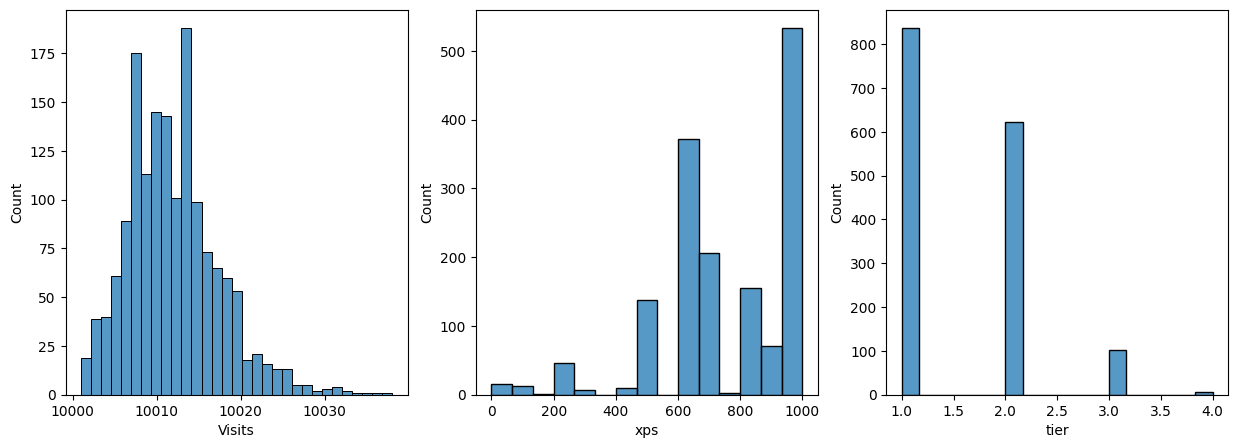

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_poi['Visits'], ax=ax[0])
sns.histplot(df_poi['xps'], ax=ax[1])
sns.histplot(df_poi['tier'], ax=ax[2])
plt.show()

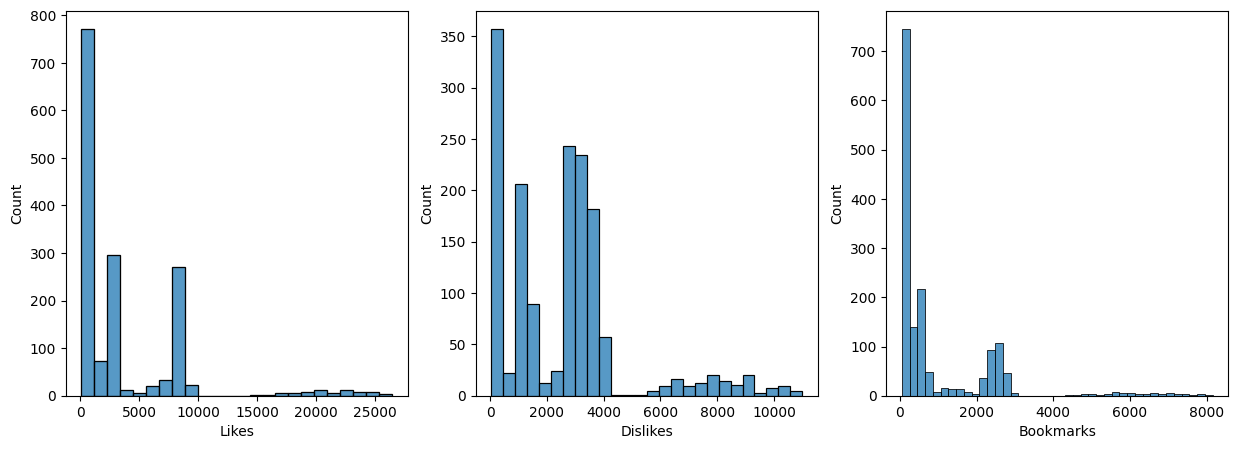

In [76]:
# Analyzing distribution of Likes, Dislikes and Bookmarks
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_poi['Likes'], ax=ax[0])
sns.histplot(df_poi['Dislikes'], ax=ax[1])
sns.histplot(df_poi['Bookmarks'], ax=ax[2])
plt.show()

By these graphs, it can be seen that trends are around certain number of likes, dislikes and bookmarks and then there few poi with very high number of likes, dislikes and bookmarks. These might correspond to more popular sites.

### Procesing of categorical variables
First we have to convert from object to list because the content of 'categories' and 'tags' is a mix of several elements.

Then we have to input values for the empty lists,

Finally encode both columns in a way that information would be usefull for the model.


In [77]:
# transform content to lists
df_poi['categories'] = df_poi['categories'].apply(eval)
df_poi['tags'] = df_poi['tags'].apply(eval)

type(df_poi['categories'][0])

list

In [78]:
# count number of elements per list
df_poi.categories.apply(len).value_counts()

,count
categories,
3,1073
4,325
2,106
1,63
0,2


In [79]:
# Visualize and manage 2 empty lists
empty_rows = df_poi[df_poi['categories'].str.len() == 0]
empty_rows

,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
24,e8cff95b-b4dd-46fd-82cc-800966e4b575,Teatro de la Zarzuela,"El Teatro de la Zarzuela, emblema cultural de ...",[],2,-3.696890,40.417202,[],500,10011,3057,1242,624,data_main/e8cff95b-b4dd-46fd-82cc-800966e4b575...
26,4b290ed0-94a4-40f1-9b5c-e11c1a4bc950,Teatro María Guerrero,"El Teatro María Guerrero, situado en Madrid, e...",[],1,-3.692992,40.422884,[],500,10015,760,3022,133,data_main/4b290ed0-94a4-40f1-9b5c-e11c1a4bc950...


The two missing categories with [], are theatres, so we are going to manually imput the categories as 'Cultura' and 'Ocio'

In [80]:
for idx in empty_rows.index:
    df_poi.at[idx, 'categories'] = ['Cultura', 'Ocio']
    print(df_poi.loc[idx, 'categories'])

['Cultura', 'Ocio']
['Cultura', 'Ocio']


In [81]:
df_poi.loc[24]

,24
id,e8cff95b-b4dd-46fd-82cc-800966e4b575
name,Teatro de la Zarzuela
shortDescription,"El Teatro de la Zarzuela, emblema cultural de ..."
categories,"[Cultura, Ocio]"
tier,2
locationLon,-3.69689
locationLat,40.417202
tags,[]
xps,500
Visits,10011


In [82]:
# Number of unique categories

all_categories = set(cat for sublist in df_poi['categories'] for cat in sublist)
print(all_categories)


{'Gastronomía', 'Escultura', 'Ocio', 'Patrimonio', 'Naturaleza', 'Cultura', 'Historia', 'Ciencia', 'Cine', 'Arquitectura', 'Misterio', 'Pintura'}


In [83]:
# OneHot Encoding for 'categories'

for category in all_categories:
    df_poi[category] = df_poi['categories'].apply(lambda x: 1 if category in x else 0)
df_poi = df_poi.drop('categories', axis=1)

df_poi.head(5)

,id,name,shortDescription,tier,locationLon,locationLat,tags,xps,Visits,Likes,...,Ocio,Patrimonio,Naturaleza,Cultura,Historia,Ciencia,Cine,Arquitectura,Misterio,Pintura
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,1,2.642262,39.572694,[],500,10009,422,...,0,0,0,0,0,0,0,0,0,1
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...",1,-3.704467,40.423037,[],500,10010,7743,...,0,1,0,0,1,0,0,0,0,0
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...",2,-3.699694,40.442045,[],250,10015,3154,...,0,1,0,0,0,1,0,0,0,0
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",1,-3.691228,40.427256,[],500,10011,8559,...,0,0,0,1,0,0,0,0,0,0
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...",1,-3.727822,40.439665,[],500,10020,915,...,0,1,0,1,0,0,0,0,0,0


In [84]:
# number of tags per column recount
df_poi.tags.apply(len).value_counts()

,count
tags,
10,473
13,466
1,136
0,107
4,102
12,88
5,58
3,56
6,33


<Axes: >

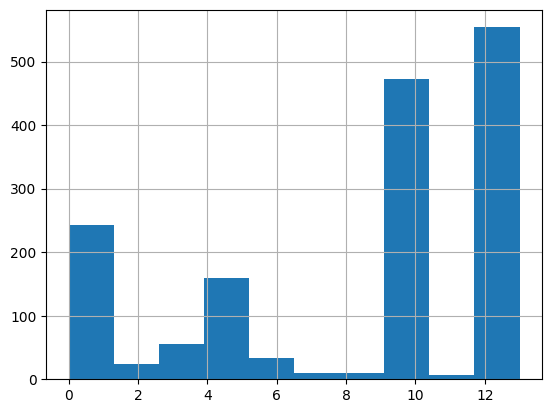

In [85]:
# Instead of using each tag, we will create a new column with the total number of tags per POI.
df_poi['number_tags'] = df_poi['tags'].apply(len)
df_poi.drop('tags', axis=1, inplace=True)
df_poi['number_tags'].hist()

### Exploring images

In [86]:

base_path = os.path.join('Deep_learning', 'data', 'raw')
#csv_path = os.path.join('Deep_learning', 'data', 'raw')
# Change the path of images so they can be read in the drive
df_poi['main_image_path'] = base_path + '/'+ df_poi['main_image_path']

# Comprobación de la primera imagen
import cv2
img_path = df_poi['main_image_path'][0]
print("Ruta completa:", img_path)

img = cv2.imread(img_path)

if img is None:
    print("❌ No se pudo leer la imagen.")
else:
    print("✅ Imagen cargada correctamente:", img.shape)


Ruta completa: Deep_learning/data/raw/data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03/main.jpg
✅ Imagen cargada correctamente: (128, 128, 3)


In [87]:
df_poi.main_image_path.apply(lambda x:cv2.imread(x).shape).value_counts()

,count
main_image_path,
"(128, 128, 3)",1569


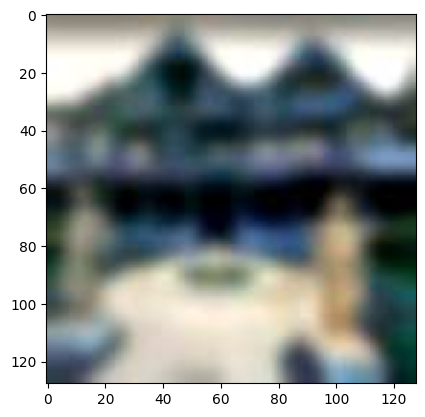

In [88]:
plt.imshow(cv2.imread(df_poi.main_image_path.iloc[random.randint(0, len(df_poi))]))

It seems like some of the pictures have some filter or modification in the colors and channels RGB.

# Creation of 'engagement' target feature.

In [89]:
numerical_columns = ['Visits', 'xps', 'tier', 'Likes', 'Dislikes', 'Bookmarks', 'number_tags']
numerical_df = df_poi[numerical_columns]
numerical_df.corr()

,Visits,xps,tier,Likes,Dislikes,Bookmarks,number_tags
Visits,1.000000,-0.005895,0.009010,-0.019961,0.014972,-0.023602,-0.043039
xps,-0.005895,1.000000,-0.761414,0.155575,-0.178567,0.131994,-0.113314
tier,0.009010,-0.761414,1.000000,-0.151130,0.197293,-0.137274,0.391474
Likes,-0.019961,0.155575,-0.151130,1.000000,-0.539695,0.971832,-0.161836
Dislikes,0.014972,-0.178567,0.197293,-0.539695,1.000000,-0.524314,0.216029
Bookmarks,-0.023602,0.131994,-0.137274,0.971832,-0.524314,1.000000,-0.148639
number_tags,-0.043039,-0.113314,0.391474,-0.161836,0.216029,-0.148639,1.000000


'Likes' and 'Bookmarks' are highly correlated, near 1.
'tier' and 'xps' also have relevant correlation between each other and Visits seems to have low correlation with all the other features.

<Axes: >

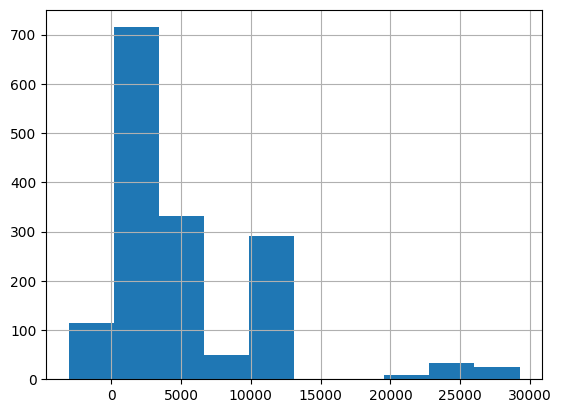

In [90]:
# First 'engagement' estimation
df_poi['engagement'] = 0.8 * df_poi['Likes'] +  df_poi['Bookmarks'] + 0.2* df_poi['Visits'] - 0.5 * df_poi['Dislikes']
df_poi['engagement'].hist()

In [91]:
len(df_poi)


1569

In [92]:
engagement_scores = pd.qcut(df_poi['engagement'], q=3, labels=[0,1,2])
engagement_scores.value_counts()



,count
engagement,
0,523
1,523
2,523


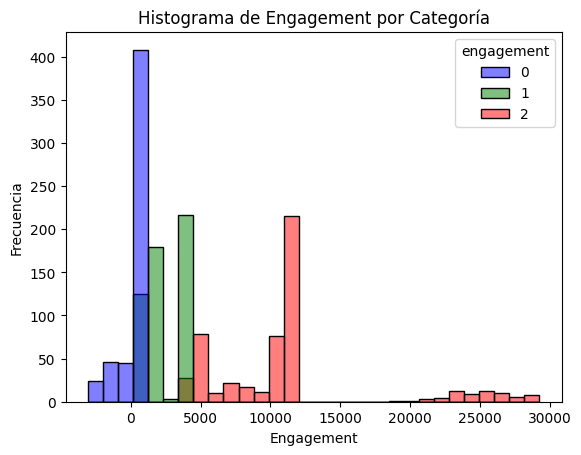

In [93]:

sns.histplot(data=df_poi, x='engagement', hue=engagement_scores,
             palette={0: 'blue', 1: 'green', 2: 'red'},
             kde=False, bins=30)

plt.title('Histograma de Engagement por Categoría')
plt.xlabel('Engagement')
plt.ylabel('Frecuencia')
plt.show()

In [94]:
df_poi['engagement_score'] = engagement_scores

## Summary

*   shortDescription won't be usefull for this model, since it would require NLP, not yet seen in class, Remove column
*   ID, I don't know if I have to keep it to access the image corralated, if not, eliminate.
*   Categories needs embedding and tags
* lon and lat? keep?
* maybe need to scale the values between columns.




In [95]:
# Drop columns with text, (we won't be using them in this model), and columns: Visits, likes, dislikes and bookmarks, as we already calculated our target score "engagement_score" with them.
df_poi.drop(columns=['id', 'name', 'shortDescription', 'Visits', 'Likes', 'Dislikes', 'Bookmarks'], inplace=True)
df_poi.dtypes

,0
tier,int64
locationLon,float64
locationLat,float64
xps,int64
main_image_path,object
Gastronomía,int64
Escultura,int64
Ocio,int64
Patrimonio,int64
Naturaleza,int64


# Division of Dataset

In [96]:
from sklearn.model_selection import train_test_split

X = df_poi.drop(columns=['engagement', 'engagement_score'])
y = df_poi['engagement_score']

# Divide train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify= y,
    random_state=42,
)
# Divide validation subset
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42,
)


In [97]:
print("intial proportion:")
print(pd.Series(y).value_counts(normalize=True))

print("\nProportion in training:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nProportion in test:")
print(pd.Series(y_test).value_counts(normalize=True))

print("\nProportion in validation:")
print(pd.Series(y_val).value_counts(normalize=True))

intial proportion:
engagement_score
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Proportion in training:
engagement_score
0    0.333665
2    0.333665
1    0.332669
Name: proportion, dtype: float64

Proportion in test:
engagement_score
1    0.334395
2    0.334395
0    0.331210
Name: proportion, dtype: float64

Proportion in validation:
engagement_score
0    0.334661
1    0.334661
2    0.330677
Name: proportion, dtype: float64


In [98]:
print("\nConteo absoluto en TRAIN:")
print(y_train.value_counts())

print("\nConteo absoluto en VALIDACIÓN:")
print(y_val.value_counts())

print("\nConteo absoluto en TEST:")
print(y_test.value_counts())



Conteo absoluto en TRAIN:
engagement_score
0    335
2    335
1    334
Name: count, dtype: int64

Conteo absoluto en VALIDACIÓN:
engagement_score
0    84
1    84
2    83
Name: count, dtype: int64

Conteo absoluto en TEST:
engagement_score
1    105
2    105
0    104
Name: count, dtype: int64


In [99]:
X_train

,tier,locationLon,locationLat,xps,main_image_path,Gastronomía,Escultura,Ocio,Patrimonio,Naturaleza,Cultura,Historia,Ciencia,Cine,Arquitectura,Misterio,Pintura,number_tags
1521,1,21.159632,49.654616,1000,Deep_learning/data/raw/data_main/fde6f250-9196...,0,0,0,1,0,1,1,0,0,0,1,0,1
1361,1,-4.728623,41.655994,1000,Deep_learning/data/raw/data_main/22ecc32f-4d31...,0,0,0,0,0,1,1,1,0,0,1,0,7
339,2,-3.700082,40.413550,700,Deep_learning/data/raw/data_main/c444ef1a-3eb7...,0,0,0,1,0,1,0,0,0,1,0,0,10
794,1,-3.689442,40.434913,800,Deep_learning/data/raw/data_main/66fa5488-dfbb...,0,1,0,0,0,1,1,0,0,0,0,0,13
673,2,-3.700373,40.442092,600,Deep_learning/data/raw/data_main/59946ead-2409...,0,1,0,0,0,1,1,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,-3.703374,40.416923,500,Deep_learning/data/raw/data_main/b0614eca-8621...,0,0,0,1,0,1,0,0,0,0,0,0,0
1075,1,-7.511083,42.519611,1000,Deep_learning/data/raw/data_main/58ae4101-759d...,0,0,0,1,0,1,1,0,0,0,0,0,10
1566,1,-3.712121,40.419088,600,Deep_learning/data/raw/data_main/21c741f5-cbe7...,0,0,0,0,0,0,0,0,0,0,0,1,2
403,1,-3.693048,40.406997,800,Deep_learning/data/raw/data_main/ee6e8672-4a94...,0,0,0,1,0,0,1,0,0,1,0,0,10


#  *Data augmentation*

# Model arquitecture

## Create the dataset custom


In [100]:
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from torchvision import transforms

In [101]:
def fit_transform_features(features):
  """
  Receives a DataFrame with numeric columns and returns a NumPy array
  with standardized values (zero mean, unit variance).
  Assumes that non-numeric or unwanted columns (e.g. image paths) are already excluded.
  """
  features_numeric = features.select_dtypes(include=['int64', 'float64']).copy()
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(features_numeric)
  return scaler, X_train_scaled

def transform_features(df, scaler):
    """Transforms dataframes with a scaler already trained in the train subset."""
    numeric = df.select_dtypes(include=['int64', 'float64']).copy()
    X_scaled = scaler.transform(numeric)
    return X_scaled

In [102]:
# Transformations for images
transform = transforms.Compose([
    #transforms.ToPILImage(),  # Convierte de array numpy a PIL
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])  #ResNet
])

In [103]:
# Convertir 'engagement_score' a numero
#df_poi['engagement_score'] = df_poi['engagement_score'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [104]:
class ds_poi(Dataset):
  """
  Class that facilitates dataset processing to load it into de DataLoader.
  it needs:
  - Initialize the dataset
  - get the length of the data set
  - obtain every item in the dataset
  """

  def __init__(self, target, image_path, features, transform=None):
    assert len(target) == len(image_path) == len(features)
    # assert que target y features sean np.array o tensor
    self.target = torch.tensor(target, dtype=torch.long)
    #processed_features = process_features(features)
    self.features = torch.tensor(features, dtype=torch.float32)
    self.image_path = image_path
    self.transform = transform

  def __len__(self):
    return len(self.features)


  def __getitem__(self, idx):
    target = self.target[idx]
    features = self.features[idx]
    im = cv2.imread(self.image_path[idx])
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(im)
    if self.transform is not None:
      im = self.transform(im)

    return target, features, im

In [105]:
# standarization
scaler, X_train_scaled = fit_transform_features(X_train.drop(columns=['main_image_path']))
X_val_scaled = transform_features(X_val.drop(columns=['main_image_path']), scaler)
X_test_scaled = transform_features(X_test.drop(columns=['main_image_path']), scaler)

# target
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# images
img_train = X_train['main_image_path'].tolist()
img_val = X_val['main_image_path'].tolist()
img_test = X_test['main_image_path'].tolist()

print(X_train_scaled)
print(type(y_train))
print(type(img_train))

[[-0.85071917  0.99427137  1.01611293 ...  1.82929504 -0.18144368
  -1.63081285]
 [-0.85071917 -0.16684658  0.18691516 ...  1.82929504 -0.18144368
  -0.32512218]
 [ 0.70505869 -0.12071533  0.05811401 ... -0.54665867 -0.18144368
   0.32772316]
 ...
 [-0.85071917 -0.12125526  0.05868812 ... -0.54665867  5.51135192
  -1.41319774]
 [-0.85071917 -0.12039985  0.05743463 ... -0.54665867 -0.18144368
   0.32772316]
 [ 0.70505869 -0.11935126  0.05979231 ... -0.54665867 -0.18144368
   0.98056849]]
<class 'numpy.ndarray'>
<class 'list'>


In [106]:
print("Shape X_train_scaled:", X_train_scaled.shape)


Shape X_train_scaled: (1004, 17)


In [107]:
# save all preprocessed data for modeling after.

import joblib

os.makedirs('data/processed', exist_ok=True)

np.save('data/processed/X_train_scaled.npy', X_train_scaled)
np.save('data/processed/X_val_scaled.npy', X_val_scaled)
np.save('data/processed/X_test_scaled.npy', X_test_scaled)

np.save('data/processed/y_train.npy', y_train)
np.save('data/processed/y_val.npy', y_val)
np.save('data/processed/y_test.npy', y_test)

joblib.dump(img_train, 'data/processed/img_train.pkl')
joblib.dump(img_val, 'data/processed/img_val.pkl')
joblib.dump(img_test, 'data/processed/img_test.pkl')

joblib.dump(scaler, 'data/processed/scaler.pkl')


['data/processed/scaler.pkl']

In [108]:
#!zip -r processed_data.zip data/processed/
#from google.colab import files
#files.download('processed_data.zip')


In [109]:

# Datasets
train_dataset = ds_poi(y_train, img_train, X_train_scaled, transform=transform)
val_dataset = ds_poi(y_val, img_val, X_val_scaled, transform=transform)
test_dataset = ds_poi(y_test, img_test, X_test_scaled, transform=transform)


In [110]:
batch_size = 32
num_features = X_train_scaled.shape[1]
num_classes = 3

In [111]:
# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Sanity check

Targets shape: torch.Size([32])
Features shape: torch.Size([32, 17])
Images shape: torch.Size([32, 3, 128, 128])


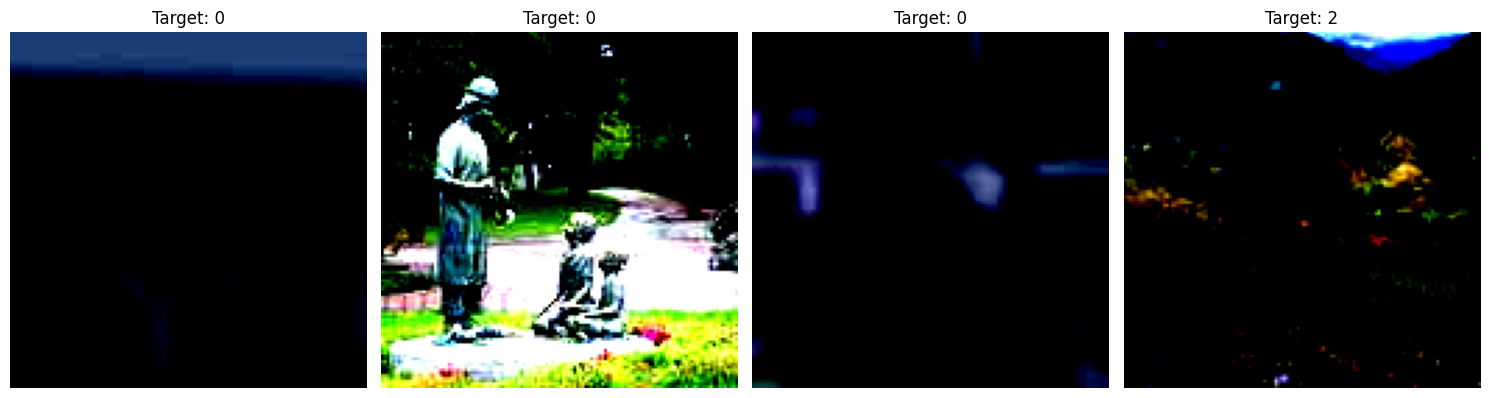

In [112]:
def show_sanity_batch(train_loader, class_labels=None):
    for batch in train_loader:
        targets, features, images = batch

        print("Targets shape:", targets.shape)
        print("Features shape:", features.shape)
        print("Images shape:", images.shape)

        # Mostrar las primeras 4 imágenes del batch
        images_np = images[:4].permute(0, 2, 3, 1).numpy()  # de [B, C, H, W] a [B, H, W, C]
        targets_np = targets[:4].numpy()

        fig, axs = plt.subplots(1, 4, figsize=(15, 5))
        for i in range(4):
            img = images[i].permute(1, 2, 0).numpy()  # De (C, H, W) a (H, W, C)
            axs[i].imshow(img)
            label = targets[i].item()
            axs[i].set_title(f'Target: {class_labels[label] if class_labels else label}')
            axs[i].axis('off')
        plt.tight_layout()
        plt.show()
        break  # Solo mostramos el primer batch

# Ejemplo de uso
show_sanity_batch(train_loader, class_labels=[0, 1, 2])

# Model

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import numpy as np
import torchvision
from PIL import Image

In [114]:

# Modelo hibrido definido antes
class HybridModel(nn.Module):
    def __init__(self, num_features, num_classes):
        super(HybridModel, self).__init__()

        # Imagen: ResNet18 sin capa final
        self.cnn = torchvision.models.resnet18(pretrained=True)
        for param in self.cnn.parameters():
            param.requires_grad = False  # freeze layers

        self.cnn_res = nn.Sequential(*list(self.cnn.children())[:-1])  # removes last layer (classificator)
        self.cnn_output_size = self.cnn.fc.in_features  # por ejemplo, 512

        # Features tabulares
        self.feat = nn.Sequential(
            #nn.Flatten(),
            nn.Linear(num_features, 64),
            nn.BatchNorm1d(64), # Speeds net's learning speed
            nn.ReLU(),
            nn.Dropout(0.3), # turns off some neurons during training to make the net more robust
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Clasificador final
        self.classifier = nn.Sequential(
            nn.Linear(self.cnn_output_size + 32, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, num_classes)  # salida: 3 clases

        )

    def forward(self, features, images):
        #print(">> Inside forward - features.shape:", features.shape)
        x_img = self.cnn_res(images)        # [B, 512, 1, 1]
        x_img = x_img.view(x_img.size(0), -1)    # [B, 512]
        x_feat = self.feat(features)
        x = torch.cat((x_img, x_feat), dim=1)

        out = self.classifier(x)
        return out


In [115]:
# Initiate the model
num_features = X_train_scaled.shape[1] # Assuming X_train_scaled is your feature array
num_classes = len(np.unique(y_train)) # Assuming y_train is your target array

# Instantiate the HybridModel
model = HybridModel(num_features=num_features, num_classes=num_classes)

# Move the model to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


HybridModel(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [116]:
# model structure

print(HybridModel)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)


<class '__main__.HybridModel'>


# Training

In [ ]:
# optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
l2_lambda = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay= l2_lambda)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epochs):
    # Entrenamiento con las funciones adaptadas
    train_loss, train_acc, lr = train_epoch(
        model, device, train_loader, criterion,
        optimizer, l1_lambda=None, scheduler=scheduler
    )

    # Validación con la función adaptada
    val_loss, val_acc = eval_epoch(
        model, device, val_loader, criterion
    )

    # Guardamos métricas
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
    print(f'Learning Rate: {lr:.6f}\n')

# Evaluación final (necesitarías adaptar también evaluate_model si la usas)
# Asumiendo que evaluate_model sigue la misma estructura que eval_epoch
_, test_acc = eval_epoch(model, device, test_loader, criterion)
print(f'Test Accuracy: {test_acc:.2f}%')

# Visualización (asegúrate de que plot_training_curves esté definida)
plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=test_acc)

Gráfico de la izquierda: Pérdida (Loss)
Train Loss (línea roja): es la pérdida en el conjunto de entrenamiento. Está bajando de forma constante, lo que indica que el modelo está aprendiendo a predecir mejor sobre los datos con los que se entrena.
Validation Loss (línea azul): es la pérdida sobre el conjunto de validación. Se mantiene bastante constante o incluso con pequeñas subidas, lo cual es una señal de alerta.
¿Qué significa esto?

Tu modelo está mejorando sobre el entrenamiento, pero no mejora sobre la validación.
Posible indicio de sobreajuste (overfitting): el modelo se adapta muy bien a los datos de entrenamiento, pero no generaliza bien a nuevos datos.
📈 Gráfico de la derecha: Precisión (Accuracy)
Train Accuracy (línea roja): la precisión en el entrenamiento va subiendo, incluso superando el 90%.
Validation Accuracy (línea azul): se mantiene estable, alrededor del 82-84%, sin mejorar.
Test Accuracy (línea punteada roja): aparece en cero. Esto sugiere que no se ha evaluado el test aún o que hay un error al graficarlo.
¿Qué significa esto?

Nuevamente vemos que el modelo se comporta bien con el entrenamiento pero no mejora en validación. Otro indicio de sobreajuste.
La línea roja (Train Accuracy) es mucho más alta que la azul (Validation Accuracy), lo cual es típico cuando el modelo memoriza los datos en lugar de generalizar.

Now I am going to try to change the Dropout layers to a higher value and add normalization layer to the dense net for the features.

In [131]:

# Modelo hibrido definido antes
class HybridModel(nn.Module):
    def __init__(self, num_features, num_classes):
        super(HybridModel, self).__init__()

        # Imagen: ResNet18 sin capa final
        self.cnn = torchvision.models.resnet18(pretrained=True)
        for param in self.cnn.parameters():
            param.requires_grad = False  # freeze layers

        self.cnn_res = nn.Sequential(*list(self.cnn.children())[:-1])  # removes last layer (classificator)
        self.cnn_output_size = self.cnn.fc.in_features  # por ejemplo, 512

        # Features tabulares
        self.feat = nn.Sequential(
            #nn.Flatten(),
            nn.Linear(num_features, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5), # increased from 0.3 to 0.5
            nn.Linear(64, 32),
            nn.BatchNorm1d(32), #added an extra normalization layer
            nn.ReLU(),
            nn.Dropout(0.3) # added another Dropout layer
        )

        # Clasificador final
        self.classifier = nn.Sequential(
            nn.Linear(self.cnn_output_size + 32, 64),
            nn.ReLU(),
            nn.Dropout(0.4), #increased dropout value
            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, num_classes)  # salida: 3 clases

        )

    def forward(self, features, images):
        #print(">> Inside forward - features.shape:", features.shape)
        x_img = self.cnn_res(images)        # [B, 512, 1, 1]
        x_img = x_img.view(x_img.size(0), -1)    # [B, 512]
        x_feat = self.feat(features)
        x = torch.cat((x_img, x_feat), dim=1)

        out = self.classifier(x)
        return out
# Instantiate the HybridModel
model = HybridModel(num_features=num_features, num_classes=num_classes)

# Move the model to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


HybridModel(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

Epoch 1/10
Train Loss: 1.0610 | Train Acc: 43.13%
Val Loss: 0.9710 | Val Acc: 60.96%
Learning Rate: 0.001000

Epoch 2/10
Train Loss: 0.9339 | Train Acc: 56.08%
Val Loss: 0.8138 | Val Acc: 66.93%
Learning Rate: 0.001000

Epoch 3/10
Train Loss: 0.7785 | Train Acc: 66.43%
Val Loss: 0.5944 | Val Acc: 76.49%
Learning Rate: 0.001000

Epoch 4/10
Train Loss: 0.6186 | Train Acc: 74.40%
Val Loss: 0.4919 | Val Acc: 80.48%
Learning Rate: 0.001000

Epoch 5/10
Train Loss: 0.5626 | Train Acc: 76.69%
Val Loss: 0.4502 | Val Acc: 80.48%
Learning Rate: 0.000100

Epoch 6/10
Train Loss: 0.4909 | Train Acc: 81.18%
Val Loss: 0.4578 | Val Acc: 79.68%
Learning Rate: 0.000100

Epoch 7/10
Train Loss: 0.4920 | Train Acc: 81.08%
Val Loss: 0.4544 | Val Acc: 79.68%
Learning Rate: 0.000100

Epoch 8/10
Train Loss: 0.4780 | Train Acc: 82.87%
Val Loss: 0.4560 | Val Acc: 80.48%
Learning Rate: 0.000100

Early stopping!
Test Accuracy: 80.89%


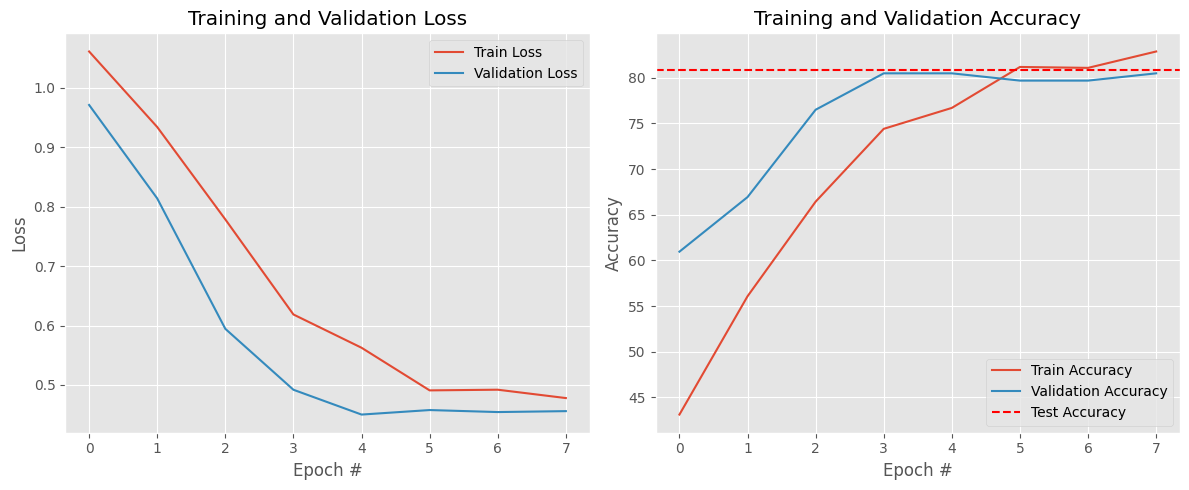

In [132]:
# optimizer and loss function
criterion = torch.nn.CrossEntropyLoss()
l2_lambda = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay= l2_lambda)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []
best_val_loss = float('inf')
patience = 3 # number of epochs where the val_loss > train_loss
epochs_no_improve = 0

for epoch in range(num_epochs):
    # Entrenamiento con las funciones adaptadas
    train_loss, train_acc, lr = train_epoch(
        model, device, train_loader, criterion,
        optimizer, l1_lambda=None, scheduler=scheduler
    )

    # Validación con la función adaptada
    val_loss, val_acc = eval_epoch(
        model, device, val_loader, criterion
    )

    # Guardamos métricas
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
    print(f'Learning Rate: {lr:.6f}\n')

    # Implemented early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Guarda el mejor modelo
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print("Early stopping!")
            break

# Evaluación final (necesitarías adaptar también evaluate_model si la usas)
# Asumiendo que evaluate_model sigue la misma estructura que eval_epoch
_, test_acc = eval_epoch(model, device, test_loader, criterion)
print(f'Test Accuracy: {test_acc:.2f}%')

# Visualización (asegúrate de que plot_training_curves esté definida)
plot_training_curves(train_losses, val_losses, train_accs, val_accs, len(train_losses), test_acc=test_acc)

# Borrador

In [117]:
def train_epoch(model: nn.Module, device: torch.device, train_loader: DataLoader,
                criterion, optimizer, l1_lambda=None, scheduler=None):
    """
    Entrena una época de la red neuronal y devuelve las métricas de entrenamiento.
    Adaptado para HybridModel que procesa tanto features como imágenes.

    Args:
        model: Modelo de red neuronal a entrenar (HybridModel)
        device: Dispositivo donde se realizará el entrenamiento (CPU/GPU)
        train_loader: DataLoader con los datos de entrenamiento (devuelve target, features, images)
        criterion: Función de pérdida a utilizar
        optimizer: Optimizador para actualizar los pesos
        scheduler: Scheduler para ajustar el learning rate
        l1_lambda: Factor de regularización L1 (opcional)

    Returns:
        train_loss: Pérdida promedio en el conjunto de entrenamiento
        train_acc: Precisión en el conjunto de entrenamiento (%)
        current_lr: Learning rate actual después del scheduler (si hay scheduler)
    """
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (target, features, images) in enumerate(train_loader):
        # Mover datos al dispositivo adecuado
        features, target, images = features.to(device), target.to(device), images.to(device)

        optimizer.zero_grad()

        # Forward pass con el HybridModel (que toma features e imágenes)
        output = model(features, images)

        # Calcular pérdida
        loss = criterion(output, target)

        # Añadir regularización L1 si se especifica
        if l1_lambda is not None:
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_norm

        # Backward pass y optimización
        loss.backward()
        optimizer.step()

        # Calcular métricas
        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    # Calcular promedios
    train_loss /= len(train_loader)
    train_acc = 100. * correct / total

    # Aplicar el scheduler después de cada época (si existe)
    if scheduler is not None:
        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]
        return train_loss, train_acc, current_lr
    else:
        return train_loss, train_acc

In [118]:
train_epoch(model, device, train_loader, criterion, optimizer)

(1.0332231558859348, 45.0199203187251)

In [122]:
def eval_epoch(model: nn.Module, device: torch.device, val_loader: DataLoader,
               criterion):
    """
    Evalúa el modelo en el conjunto de validación para HybridModel.

    Args:
        model: Modelo HybridModel a evaluar
        device: Dispositivo donde se realizará la evaluación (CPU/GPU)
        val_loader: DataLoader con los datos de validación (devuelve target, features, images)
        criterion: Función de pérdida a utilizar

    Returns:
        val_loss: Pérdida promedio en el conjunto de validación
        val_acc: Precisión en el conjunto de validación (%)
    """
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for target, features, images in val_loader:
            # Mover datos al dispositivo adecuado
            features, target, images = features.to(device), target.to(device), images.to(device)

            # Forward pass con el HybridModel
            output = model(features, images)

            # Calcular pérdida
            loss = criterion(output, target)

            # Calcular métricas
            val_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100. * correct / total

    return val_loss, val_acc

In [123]:
eval_epoch(model, device, val_loader, criterion)

(0.6507028117775917, 74.9003984063745)

Epoch 1/10
Train Loss: 0.6167 | Train Acc: 74.60%
Val Loss: 0.4703 | Val Acc: 80.88%
Learning Rate: 0.001000

Epoch 2/10
Train Loss: 0.5267 | Train Acc: 78.88%
Val Loss: 0.4405 | Val Acc: 82.47%
Learning Rate: 0.001000

Epoch 3/10
Train Loss: 0.4459 | Train Acc: 82.47%
Val Loss: 0.4403 | Val Acc: 81.27%
Learning Rate: 0.001000

Epoch 4/10
Train Loss: 0.4254 | Train Acc: 83.27%
Val Loss: 0.4163 | Val Acc: 83.27%
Learning Rate: 0.001000

Epoch 5/10
Train Loss: 0.4220 | Train Acc: 82.47%
Val Loss: 0.4355 | Val Acc: 80.48%
Learning Rate: 0.000100

Epoch 6/10
Train Loss: 0.3785 | Train Acc: 83.96%
Val Loss: 0.4070 | Val Acc: 83.67%
Learning Rate: 0.000100

Epoch 7/10
Train Loss: 0.3683 | Train Acc: 84.66%
Val Loss: 0.4035 | Val Acc: 82.47%
Learning Rate: 0.000100

Epoch 8/10
Train Loss: 0.3685 | Train Acc: 84.66%
Val Loss: 0.4120 | Val Acc: 82.47%
Learning Rate: 0.000100

Epoch 9/10
Train Loss: 0.3671 | Train Acc: 85.46%
Val Loss: 0.4068 | Val Acc: 83.27%
Learning Rate: 0.000100

Epoch 10/1

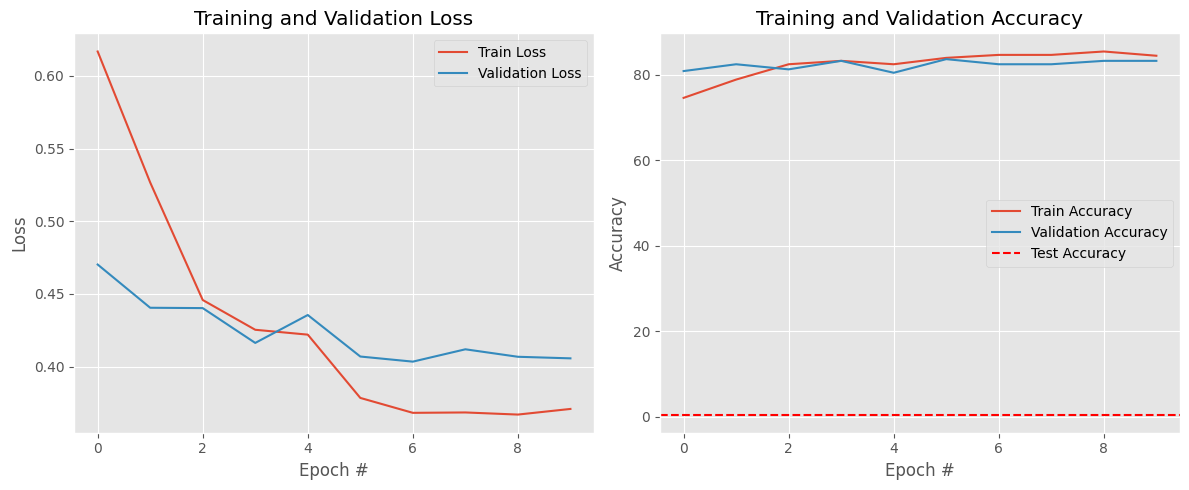

In [124]:
# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epochs):
    # Entrenamiento con las funciones adaptadas
    train_loss, train_acc, lr = train_epoch(
        model, device, train_loader, criterion,
        optimizer, l1_lambda=None, scheduler=scheduler
    )

    # Validación con la función adaptada
    val_loss, val_acc = eval_epoch(
        model, device, val_loader, criterion
    )

    # Guardamos métricas
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
    print(f'Learning Rate: {lr:.6f}\n')

# Evaluación final (necesitarías adaptar también evaluate_model si la usas)
# Asumiendo que evaluate_model sigue la misma estructura que eval_epoch
_, test_acc = eval_epoch(model, device, test_loader, criterion)
print(f'Test Accuracy: {test_acc:.2f}%')

# Visualización (asegúrate de que plot_training_curves esté definida)
plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=test_acc)

In [ ]:
import torch
from tqdm import tqdm

def train_loop(model, train_loader, val_loader, optimizer, criterion, n_epochs=10, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model = model.to(device)

    for epoch in range(n_epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for target, features, images in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs} - Training"):
            target, features, images = target.to(device), features.to(device),  images.to(device)

            optimizer.zero_grad()
            output = model(features, images)

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            #train_loss += loss.item() * target.size(0)
            #_, predicted = torch.max(outputs, 1)
            #correct += (predicted == target).sum().item()
            #total += target.size(0)

        #train_loss = running_loss / total
        #train_acc = correct / total

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        train_loss /= len(train_loader)
        train_acc = 100. * correct / total
      # Aplicar el scheduler después de cada época
    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]
    return train_loss, train_acc, current_lr



In [ ]:
n_epochs = 10
train_loop(model, train_loader, val_loader, optimizer, criterion, n_epochs)

In [ ]:

def eval_epoch(model: nn.Module, device: torch.device, val_loader: DataLoader,
               criterion):
    """
    Evalúa el modelo en el conjunto de validación.

    Args:
        model: Modelo de red neuronal a evaluar
        device: Dispositivo donde se realizará la evaluación (CPU/GPU)
        val_loader: DataLoader con los datos de validación
        criterion: Función de pérdida a utilizar

    Returns:
        val_loss: Pérdida promedio en el conjunto de validación
        val_acc: Precisión en el conjunto de validación (%)
    """
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    lrs = []
    with torch.no_grad():
        for target, features, images in val_loader:
            target, features, images = target.to(device), features.to(device),  images.to(device)
            output = model(features, images)
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100. * correct / total

    return val_loss, val_acc

In [ ]:
def evaluate(model, loader, device='cuda'):
    model.eval()
    total, correct = 0, 0
    all_predictions, all_target = [], []

    with torch.no_grad():
        for target, features, images  in loader:
            target, features, images = target.to(device), features.to(device),  images.to(device)
            outputs = model(features, images)
            _, predictions = torch.max(outputs, 1)

            total += target.size(0)
            correct += (predictions == target).sum().item()
            all_predictions += predictions.cpu().tolist()
            all_target += target.cpu().tolist()

    acc = correct / total
    print(f'Accuracy: {acc:.4f}')
    return all_predictions, all_target

In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def training_curves(num_epochs, model, device, train_loader, val_loader, criterion, optimizer, scheduler=None):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    lrs = []

    all_predictions = []
    all_targets = []

    pbar = tqdm(range(num_epochs), desc='Training', unit='epoch')

    for epoch in pbar:
        # --- ENTRENAMIENTO ---
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        for target, features, images in train_loader:
            target, features, images = target.to(device), features.to(device), images.to(device)
            optimizer.zero_grad()

            outputs = model(images, features)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * target.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == target).sum().item()
            total += target.size(0)

        train_loss /= total
        train_acc = correct / total

        # --- VALIDACIÓN ---
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        all_preds, all_lbls = [], []

        with torch.no_grad():
            for target, features, images in val_loader:
                target, features, images = target.to(device), features.to(device), images.to(device)
                outputs = model(images, features)
                loss = criterion(outputs, target)

                val_loss += loss.item() * target.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == target).sum().item()
                val_total += target.size(0)

                all_preds.extend(preds.cpu().tolist())
                all_lbls.extend(target.cpu().tolist())

        val_loss /= val_total
        val_acc = val_correct / val_total

        # --- LEARNING RATE ---
        current_lr = optimizer.param_groups[0]['lr']
        if scheduler:
            scheduler.step()

        # --- GUARDAR MÉTRICAS ---
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        lrs.append(current_lr)

        all_predictions.extend(all_preds)
        all_targets.extend(all_lbls)

        # --- ACTUALIZAR BARRA ---
        pbar.set_postfix({
            'train_loss': f'{train_loss:.4f}',
            'train_acc': f'{train_acc:.4f}',
            'val_loss': f'{val_loss:.4f}',
            'val_acc': f'{val_acc:.4f}',
            'lr': f'{current_lr:.2e}'
        })

    # --- REPORTE FINAL ---
    print("\n[INFO] Clasificación final:")
    print(classification_report(all_targets, all_predictions, zero_division=1))

    # --- GRÁFICAS ---
    plot_training_curves(train_losses, val_losses, train_accs, val_accs)
    plot_learning_rate(lrs)


In [ ]:
training_curves(10, model, device, train_loader, val_loader, criterion, optimizer, scheduler=None)

In [ ]:
def plot_training_curves(train_losses, val_losses, train_accs, val_accs):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # --- Loss ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.title('Curva de Pérdida')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # --- Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Accuracy')
    plt.plot(epochs, val_accs, label='Val Accuracy')
    plt.title('Curva de Precisión')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_learning_rate(lrs):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(lrs)+1), lrs)
    plt.title('Learning Rate por Época')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.show()


In [ ]:
import torch
from tqdm import tqdm

def training_curves(num_epochs, model, device, train_loader, val_loader, criterion, optimizer, scheduler):
  train_losses, val_losses = [], []
  train_accs, val_accs = [], []
  lrs = []

  pbar = tqdm(range(num_epochs), desc='Training', unit='epoch',
              postfix={'train_loss': 0, 'train_acc': 0,
                      'val_loss': 0, 'val_acc': 0, 'lr': 0})


  for epoch in pbar:

      train_loss, train_acc, current_lr = train_loop(model, train_loader, val_loader, optimizer, criterion, n_epochs=1, device=device)
      val_loss, val_acc = evaluate(model, val_loader, device)

      train_losses.append(train_loss)
      train_accs.append(train_acc)
      val_losses.append(val_loss)
      val_accs.append(val_acc)
      lrs.append(current_lr)

      # Update progress bar with metrics
      pbar.set_postfix({'train_loss': f'{train_loss:}',
                      'train_acc': f'{train_acc:}%',
                      'val_loss': f'{val_loss:}',
                      'val_acc': f'{val_acc:}%',
                      'lr': f'{current_lr:}'})

  #return train_losses, train_accs, val_losses, val_accs
  # Calculamos la pérdida
  test_acc = 0
  test_acc = 100 * sum(1 for p, t in zip(all_predictions, all_targets) if p == t) / len(all_targets)
  print(f"[INFO]: Test Accuracy: {test_acc:.4f}")

  # Modificamos el classification_report para manejar el warning de zero_division
  print(classification_report(all_targets, all_predictions, zero_division=1))

  # Mostramos gráfica de accuracy y losses
  plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc)

  # Mostramos gráfica del learning rate
  plot_learning_rate(lrs, num_epochs)



In [ ]:
eval_epoch(model, device, val_loader, criterion)

In [ ]:
training_curves(10, model, device, train_loader, val_loader, criterion, optimizer, scheduler)

In [ ]:
def plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=None):
    plt.style.use("ggplot")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label="Train Loss")
    plt.plot(range(num_epochs), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accs, label="Train Accuracy")
    plt.plot(range(num_epochs), val_accs, label="Validation Accuracy")
    if test_acc is not None:
        plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=accuracy)

In [ ]:
       # ---- VALIDACIÓN ----
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for target, features, images in val_loader:
                target, features, images = target.to(device), features.to(device),  images.to(device)

                outputs = model(feat, im)
                loss = criterion(outputs, target)

                val_loss += loss.item() * target.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == target).sum().item()
                val_total += target.size(0)

        val_loss /= val_total
        val_acc = val_correct / val_total

        print(f"📊 Epoch {epoch+1}/{n_epochs} | "
              f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

In [ ]:
# Funciones de entrenamiento y evaluación
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epochs):
    loss, acc, lr = train_loop(model, device, train_loader, criterion, optimizer)
    # validation
    val_loss, val_acc = eval_epoch(HybridModel, device, val_loader, criterion)

    #Save metrics
    train_losses.append(loss)
    train_accs.append(acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch {epoch+1}, Train Loss: {loss:.4f}, Train Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {lr:.6f}')

# Evaluation
accuracy = evaluate_model(HybridModel, test_loader, device)
print('Test accuracy: %.3f' % accuracy)







In [ ]:
# Entrenamiento
n_epochs = 10
for epoch in range(n_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, dev)
    val_loss, val_acc = evaluate(model, val_loader, criterion, dev)

    print(f"\nEpoch {epoch+1}/{n_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

In [ ]:
class HibridModel(nn.Module):
  def __init__(self, num_features, num_classes):
    super(HibridModel, self).__init__()

    self.cnn = models.resnet18(pretrained=True)
    self.cnn.fc = nn.Linear(self.cnn.fc.in_features, 128)

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784, 32)
    self.activation = activation_function
    self.fc2 = nn.Linear(32, 10)
    self.activation = activation_function
    self.fc1 = nn.Linear(n_features, 1)

  def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [ ]:
# construimos el modelo base usando ResNet18 que es más pequeño que VGG16
base_model = torchvision.models.resnet18(pretrained=True)
base_model.eval()  # Set to evaluation mode

# congelamos todas las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => transfer learning
for param in base_model.parameters():
    param.requires_grad = False

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
# Reemplazamos el clasificador con uno nuevo más pequeño para 10 clases
num_features = base_model.fc.in_features
base_model.fc = torch.nn.Linear(num_features, 3) # Added our own clasifier for the 3 categories of 'engagement_score'

#setting up for training

# definimos el optimizador y la función de pérdida
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(base_model.fc.parameters(), lr=0.001)

# vemos la estructura del modelo y el número de parámetros
print(base_model)
total_params = sum(p.numel() for p in base_model.parameters())
trainable_params = sum(p.numel() for p in base_model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

In [ ]:
import torch.optim as optim
import torch.nn as nn
import sys
sys.path.append('Deep_learning/scr')
from module_utils import train_epoch, eval_epoch, evaluate_model, plot_training_curves

In [ ]:
# Definimos la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()

# Configuramos L2 regularization a través de weight_decay
l2_lambda = 1e-4

optimizer = optim.Adam(HibridModel.parameters(), lr=0.001, weight_decay=l2_lambda)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Entrenamos el modelo
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
HibridModel.to(device)

# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epochs):
    loss, acc, lr = train_epoch(base_model, device, train_loader, criterion, optimizer, scheduler=scheduler)

    # Validación
    val_loss, val_acc = eval_epoch(base_model, device, val_loader, criterion)

    # Guardamos métricas
    train_losses.append(loss)
    train_accs.append(acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}, Train Loss: {loss:.4f}, Train Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {lr:.6f}')

# Evaluación
accuracy = evaluate_model(base_model, test_loader, device)
print('Test accuracy: %.3f' % accuracy)

plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=accuracy)

In [ ]:
class ModelTest(nn.Module):
  def__intit__(self, n_features):
    super(ModelTest, self).__init__()

    self.fc1 = nn.Linear(n_features, 1)
    pass
  def forward(self, features, im):
    x = self.fc1(features)

    # TODO process images

    x = torch.cat((x, conv), dim=1)

    # classifier
    return x

In [ ]:
import torch.optim as optim

model = ModelTest(len(features))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)